# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline 
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_pacf #PACF 
from statsmodels.graphics.tsaplots import plot_acf #ACF
from matplotlib.pylab import rcParams

In [2]:
# your code here
df = pd.read_csv('exch_rates.csv')
df.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [3]:
df.columns = ['Date', 'EUR', 'AUD', 'DKK']
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [4]:
df.head()

,EUR,AUD,DKK
Date,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

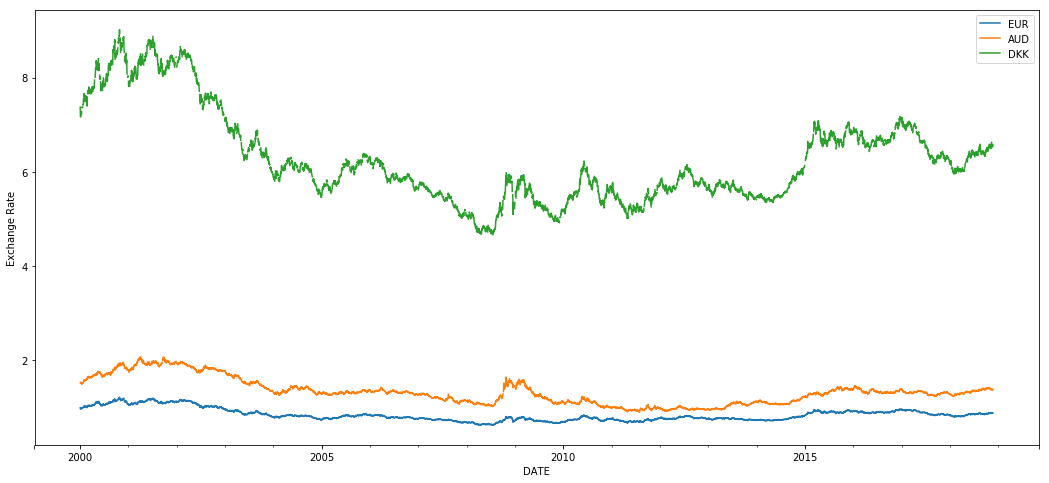

In [5]:
# your code here
df.plot(figsize=(18,8))
plt.xlabel('DATE')
plt.ylabel('Exchange Rate');

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [6]:
# your code here
df.corr()

,EUR,AUD,DKK
EUR,1.000000,0.883181,0.999952
AUD,0.883181,1.000000,0.882513
DKK,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The EUR and AUD is highly correlated. But the EUR and the DKK (Danish Krone) is perfectly correlated. This is because DKK is pegged to the EUR via ERM II or the European Exchange Rate Mechanism in March 13, 1979. 

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2085b240>,
      dtype=object)

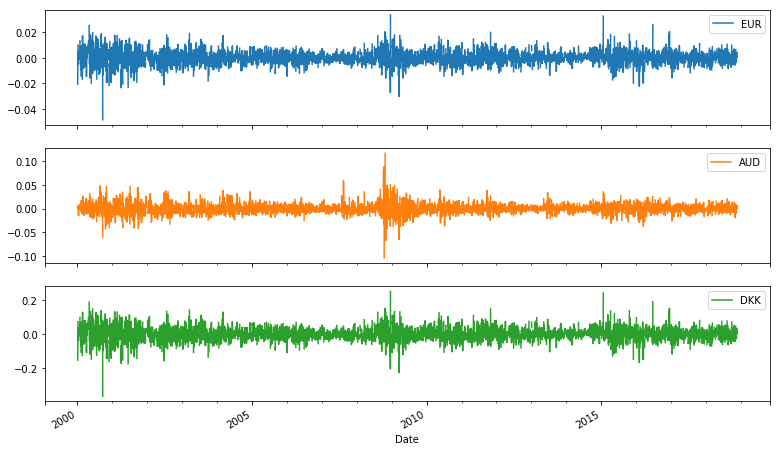

In [7]:
# your code here
df_diff = df.diff(periods=1)

df_diff.plot(figsize=(13,8), subplots=True)

In [8]:
# your code here
df_diff.corr()

,EUR,AUD,DKK
EUR,1.000000,0.545369,0.999667
AUD,0.545369,1.000000,0.545133
DKK,0.999667,0.545133,1.000000


### Explain what's going on

Differencing the series led to a less correlated EUR/AUD. High correlation was a result of seasonality. Differencing led to an increase in coreelation between series. 

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [9]:
# your code here
eur = df[['EUR']]

In [10]:
# your code here
eur_shift = eur.shift(periods=1)
eur_shift.head()

,EUR
Date,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


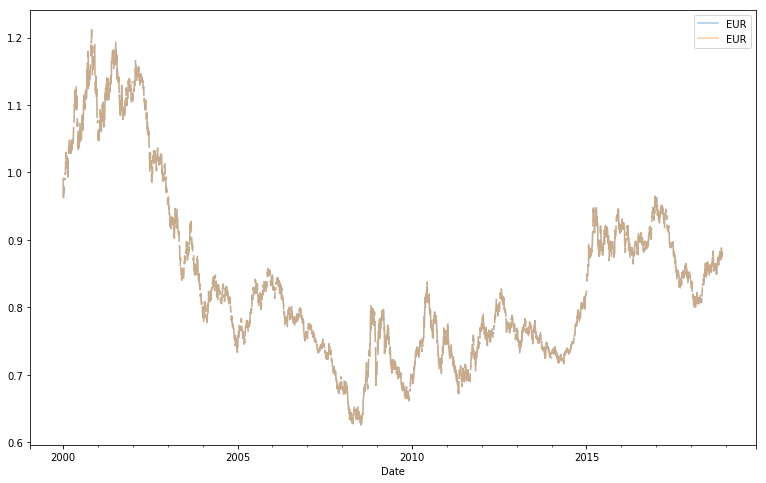

In [11]:
# your code here
lag_1 = pd.concat([eur_shift, eur], axis=1)
lag_1.plot(figsize= (13,8), alpha=.4)

Repeat this, but for a "lag 5 autocorrelation"

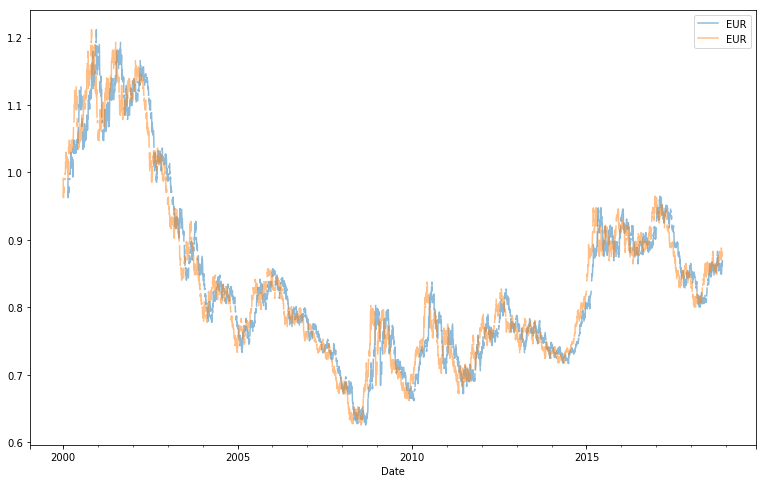

In [12]:
eur_shift = eur.shift(periods=50)
eur_shift.head()
lag_50 = pd.concat([eur_shift, eur], axis=1)
lag_50.plot(figsize= (13,8), alpha=.5)

In [13]:
lag_50.corr()

,EUR,EUR
EUR,1.000000,0.968321
EUR,0.968321,1.000000


### What's your conclusion here?

Autocorrelation is very high in these time series, even up to a lag as big as 50. This is no big surprise though: remember that these are random walk series, which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

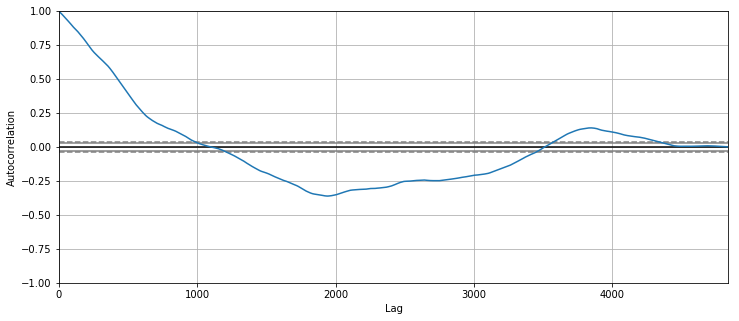

In [14]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna())

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

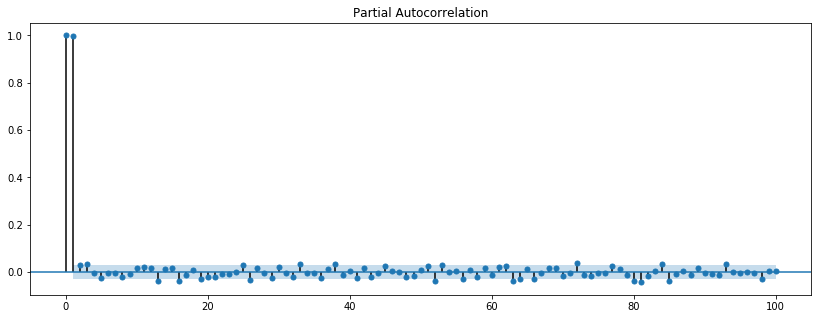

In [15]:
# your code here
rcParams['figure.figsize'] = 14,5 
plot_pacf(eur.dropna(), lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [16]:
# your code here
p = pd.read_csv('passengers.csv')
p.Month = pd.to_datetime(p.Month)
p.set_index('Month', inplace=True)
p.columns = ['Passengers']
p.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'PACF')

<Figure size 936x360 with 0 Axes>

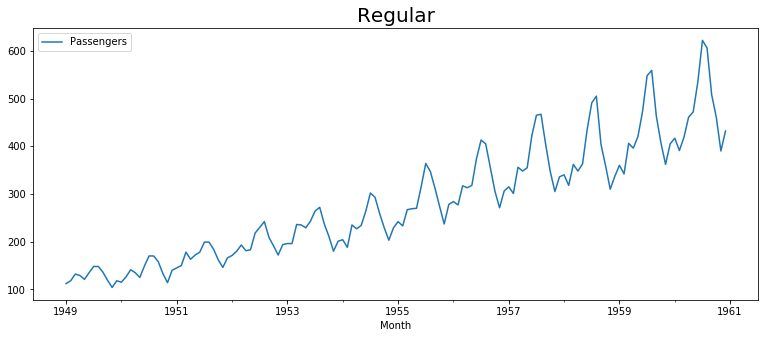

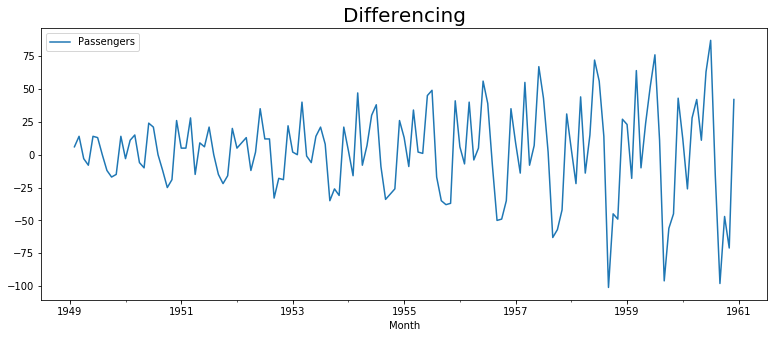

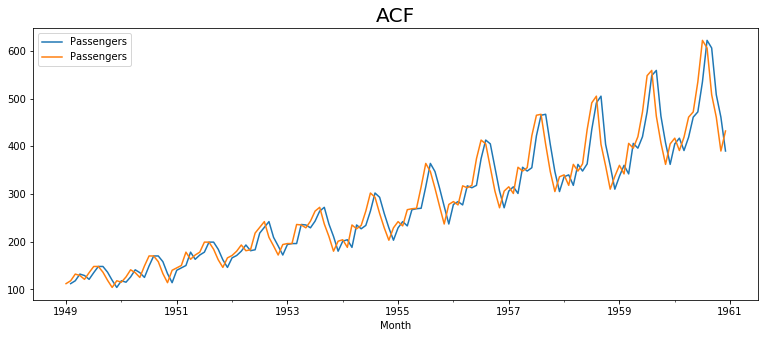

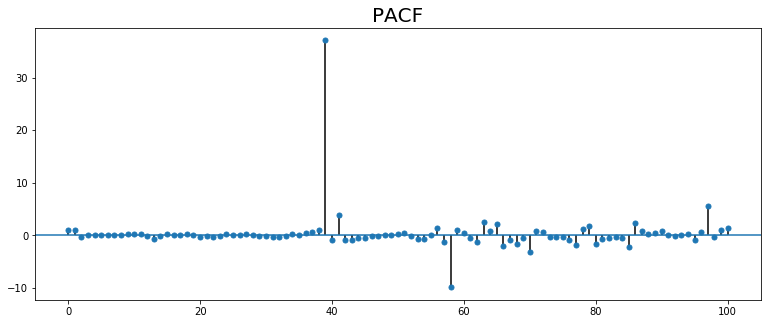

In [26]:
# your code here

plt.figure(figsize=(13,5))
p.plot()
plt.title("Regular",fontsize=20)


p_diff = p[['Passengers']].diff(periods=1)

p_diff.plot()
plt.title("Differencing", fontsize=20)


p_shift = p[['Passengers']].shift(periods=1)
lag = pd.concat([p_shift, p], axis=1) 
lag.plot()
plt.title("ACF",fontsize=20)

rcParams['figure.figsize'] = 13,5
plot_pacf(p.dropna(), lags=100);
plt.title("PACF", fontsize=20)



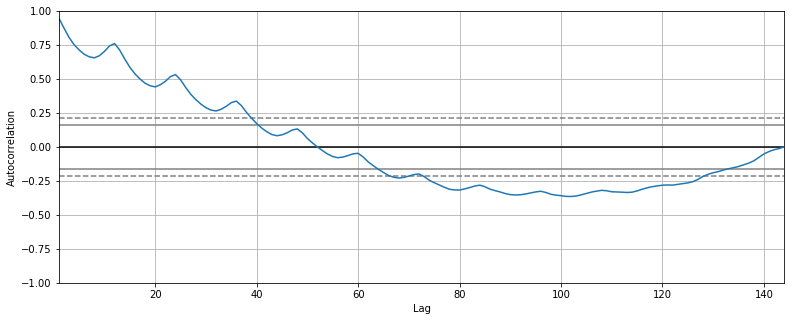

In [18]:
# your code here
pd.plotting.autocorrelation_plot(p)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


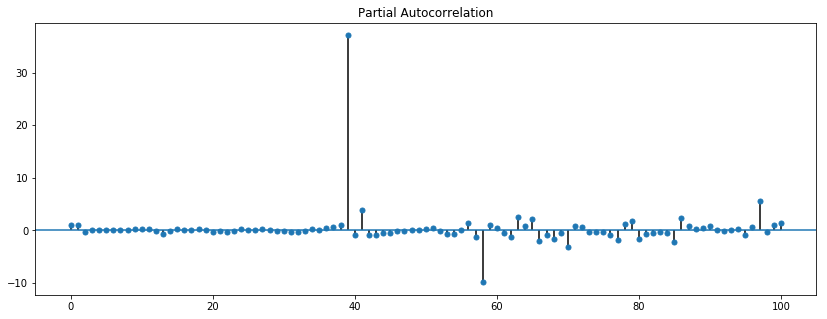

In [27]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(p.dropna(), lags = 100);

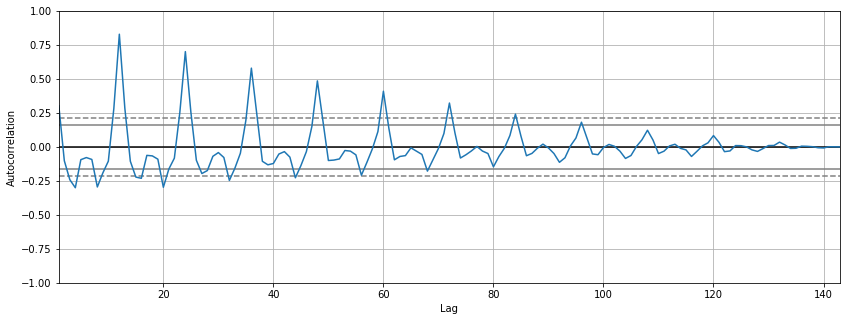

In [28]:
# your code here
pd.plotting.autocorrelation_plot(p_diff.dropna());

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


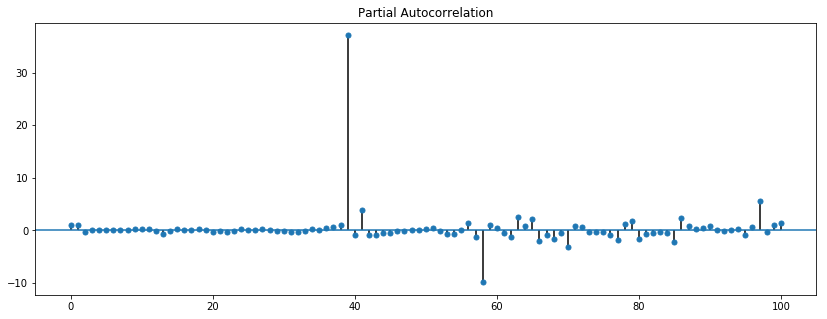

In [38]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(p.dropna(), lags = 100);

In [22]:
# your code here

rcParams['figure.figsize'] = 14, 5

plot_pacf(p_diff.dropna(), lags = 100);

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [31]:
# your code here
data = pd.read_csv('NYSE_monthly.csv')
data.Month = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
data.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


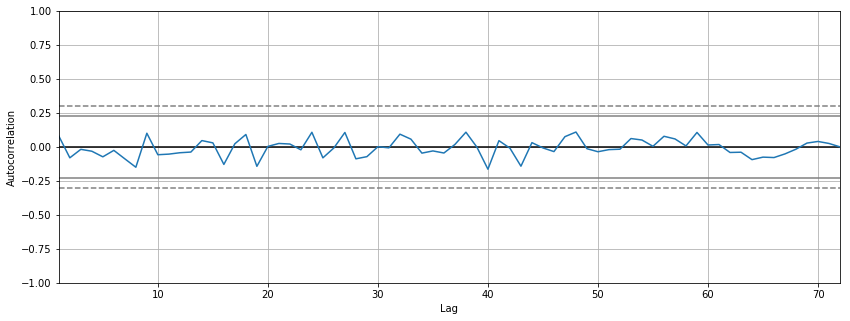

In [32]:
# your code here
pd.plotting.autocorrelation_plot(data)

Text(0.5, 1.0, 'Autocorrelation with Differencing')

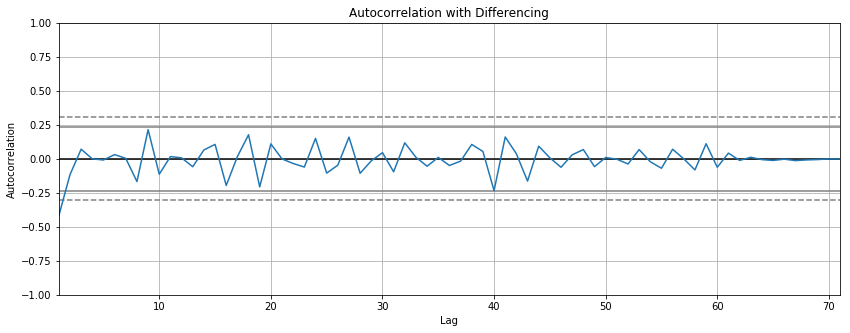

In [35]:
# your code here
data_diff = data.diff(periods=1)
pd.plotting.autocorrelation_plot(data_diff.dropna())
plt.title("Autocorrelation with Differencing")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


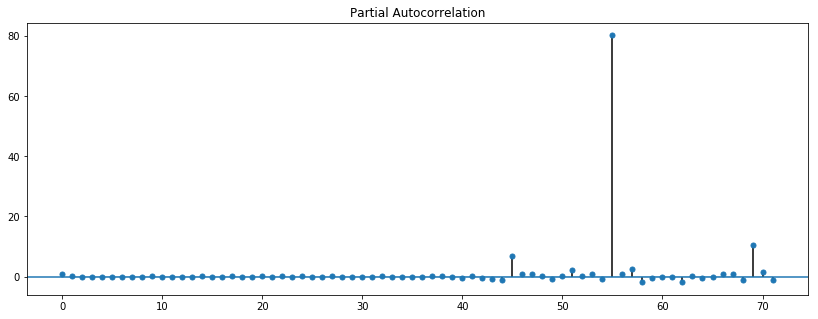

In [37]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(data, lags= 100)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


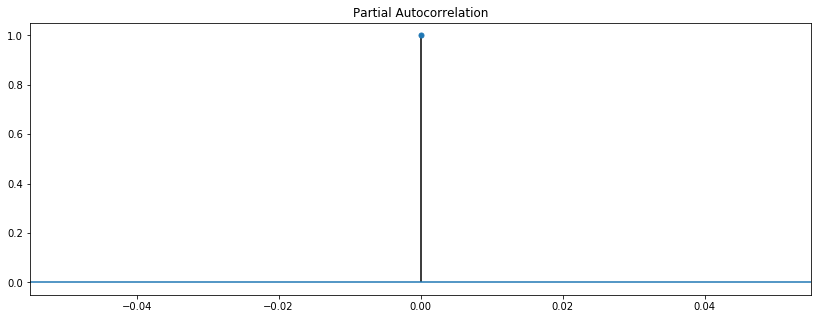

In [40]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(data_diff, lags= 100);

## Your conclusion here

Autocorrelations and partial autocorrelations are virtually 0 for any lag. This data series was a white noise, meaning there is no trend or no seasonality i.e. this is time series is stationary. 



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!